In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

How many rows and columns are in gdp_df? What are the data types of each column?

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

What was the median GDP per capita value in 2020?

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
Which country was the first to have a GDP per capita greater than $100,000?

Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

Look at the number of observations in this dataset per year. What do you notice?

What is the first year to have a non-zero internet users percentage value?

How does the distribution of internet users percent differ for 2000 and 2014?

For how many countries was the percentage of internet users below 5% in 2014?

Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

Stretch Question: How does the median internet users percentage compare for the three gdp groups?

Bonus exercise:
Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [5]:
gdp_df = pd.read_csv('C:/Users/marya/Documents/DA11/Python/data/gdp_percapita.csv')

In [ ]:
# Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [16]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [ ]:
# How many rows and columns are in gdp_df? 7662
# What are the data types of each column? 4 - float, int64, object

In [50]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [ ]:
# Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [51]:
gdp_df.drop(['Value Footnotes'], axis=1)

KeyError: "['Value Footnotes'] not found in axis"

In [64]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [ ]:
# How many countries have data for all years? 242
# Which countries are missing many years of data? Look at the number of observations per year.
# What do you notice?

In [44]:
gdp_df_all = gdp_df['Country or Area'].value_counts()
gdp_df_all

Country or Area
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [ ]:
#In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
#Go to the Python Graph Gallery (https://www.python-graph-gallery.com/)
#and look at the different types of plots under the Distribution section.
#Create a histogram, a density plot, a boxplot, and a violin plot.
#What do you notice when you look at these plots?
#How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Text(0.5, 0, 'Bins')

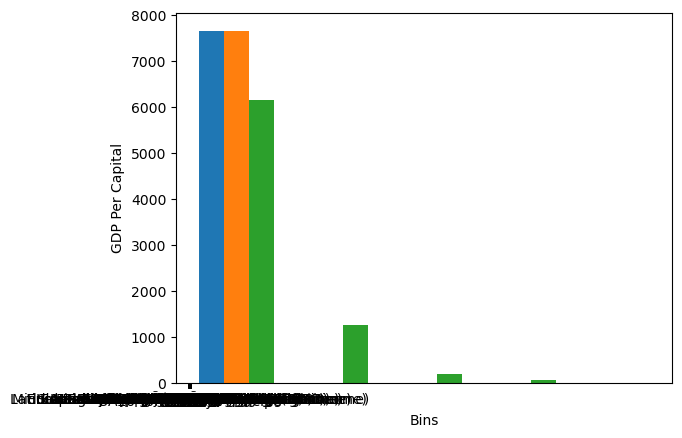

In [66]:
#Create a histogram, a density plot, a boxplot, and a violin plot.
plt.hist(gdp_df, bins = 5)
plt.ylabel("GDP Per Capital")
plt.xlabel("Bins")

C:\Users\marya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

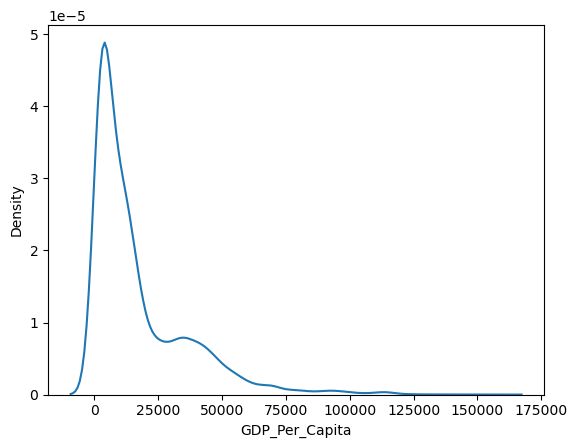

In [67]:
#Create a histogram, a density plot, a boxplot, and a violin plot.
sns.kdeplot(gdp_df['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

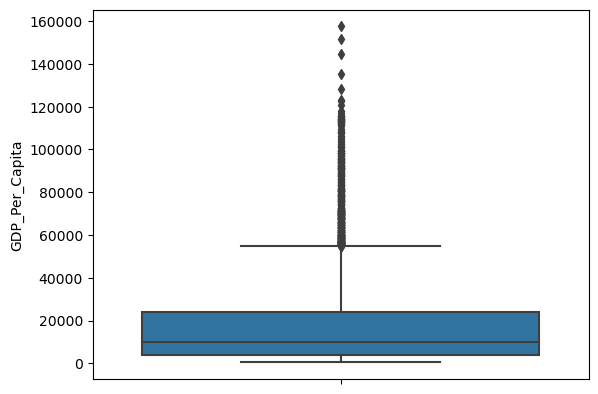

In [69]:
#Create a histogram, a density plot, a boxplot, and a violin plot.
sns.boxplot(y=gdp_df["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

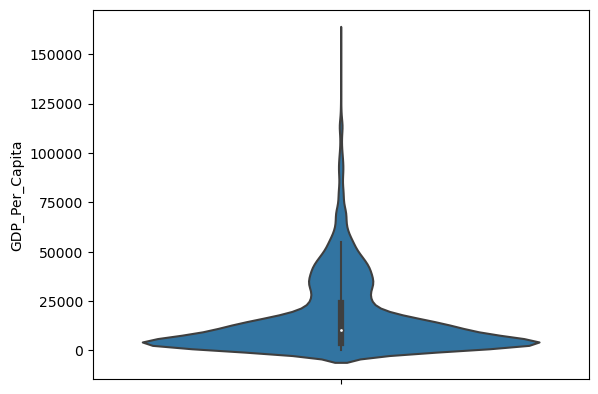

In [70]:
#Create a histogram, a density plot, a boxplot, and a violin plot.

sns.violinplot(y=gdp_df["GDP_Per_Capita"])

In [ ]:
# What was the median GDP per capita value in 2020?

In [86]:
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]

In [87]:
gdp_df_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [88]:
gdp_df_med = gdp_df_2020["GDP_Per_Capita"].median()

In [89]:
gdp_df_med

13357.997573370474

In [ ]:
# For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

# A boxplot
# A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# A scatterplot
# A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
# Which country was the first to have a GDP per capita greater than $100,000?

In [103]:
gdp_decades = gdp_df[gdp_df["Year"].isin({1990,2000,2010,2020})]

<Axes: ylabel='GDP_Per_Capita'>

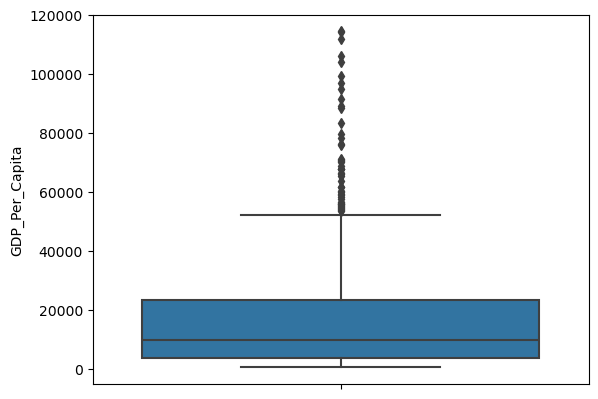

In [107]:
# A boxplot
sns.boxplot(y=gdp_decades["GDP_Per_Capita"])

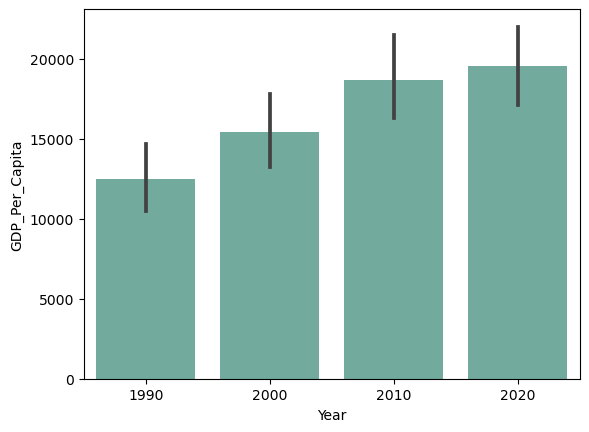

In [109]:
# A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", data = gdp_decades,
    color='#69b3a2');

In [ ]:
# A scatterplot
# A scatterplot with a trend line overlaid
# (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

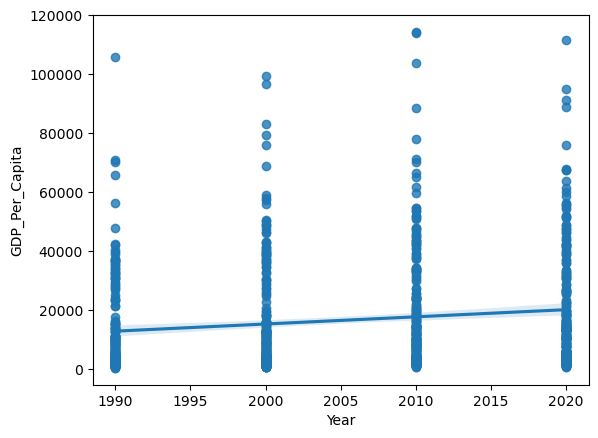

In [115]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

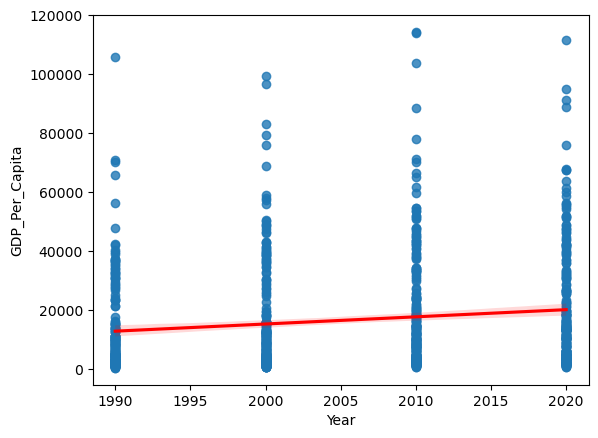

In [116]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"],line_kws={"color": "r"})

In [ ]:
#Which country was the first to have a GDP per capita greater than $100,000?

In [ ]:
# Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this.
# Check the arguments for the read_csv function to find ones that can help correct the errors
# (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
# Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly
# Also, check the datatypes of the columns.

In [14]:
internet_df = pd.read_csv('C:/Users/marya/Documents/DA11/Python/data/internet_use.csv', nrows = 4495)

In [15]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [16]:
internet_df = internet_df.drop(labels = 'Value Footnotes', axis=1)

In [17]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [18]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [20]:
#Look at the number of observations in this dataset per year. What do you notice?
internet_df.groupby(internet_df['Year'])['Country'].count()

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64

In [ ]:
#What is the first year to have a non-zero internet users percentage value?



In [ ]:
#How does the distribution of internet users percent differ for 2000 and 2014?



In [ ]:
#For how many countries was the percentage of internet users below 5% in 2014?